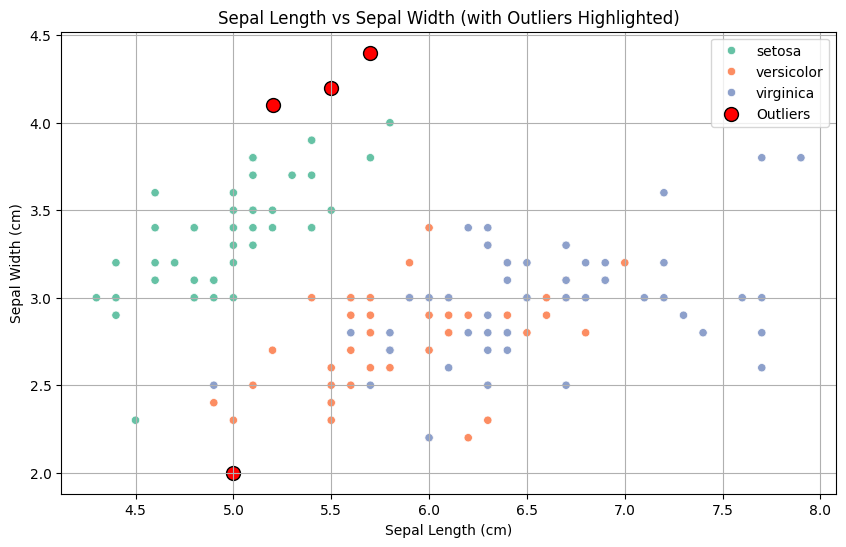

Outlier rows in sepal_width column:
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/iris.csv')

# Detect outliers in 'sepal_width' using IQR
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier rows
outliers = df[(df['sepal_width'] < lower_bound) | (df['sepal_width'] > upper_bound)]
non_outliers = df[(df['sepal_width'] >= lower_bound) & (df['sepal_width'] <= upper_bound)]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_outliers, x='sepal_length', y='sepal_width', hue='species', palette='Set2')
plt.scatter(outliers['sepal_length'], outliers['sepal_width'], color='red', s=100, label='Outliers', edgecolor='black')
plt.title('Sepal Length vs Sepal Width (with Outliers Highlighted)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

# Print the outliers
print("Outlier rows in sepal_width column:")
print(outliers)


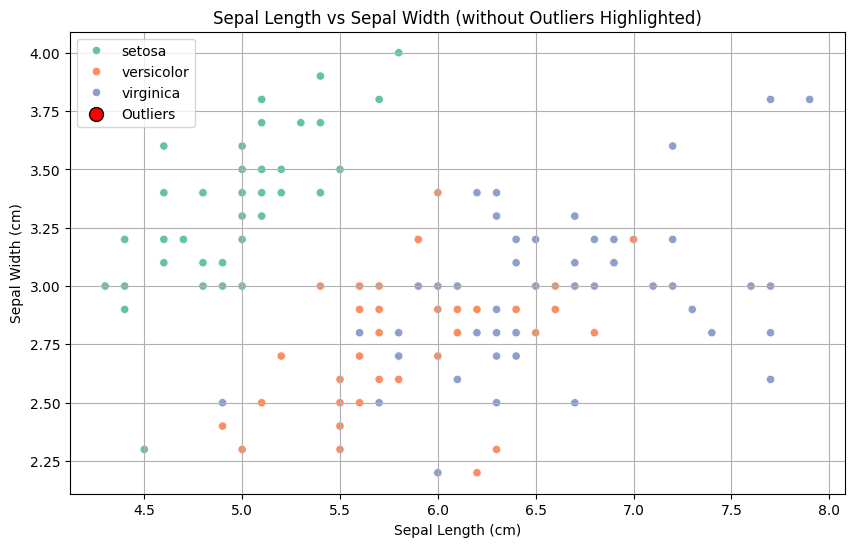

Outlier rows in sepal_width column:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/cleaned iris.csv')

# Detect outliers in 'sepal_width' using IQR
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier rows
outliers = df[(df['sepal_width'] < lower_bound) | (df['sepal_width'] > upper_bound)]
non_outliers = df[(df['sepal_width'] >= lower_bound) & (df['sepal_width'] <= upper_bound)]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_outliers, x='sepal_length', y='sepal_width', hue='species', palette='Set2')
plt.scatter(outliers['sepal_length'], outliers['sepal_width'], color='red', s=100, label='Outliers', edgecolor='black')
plt.title('Sepal Length vs Sepal Width (without Outliers Highlighted)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

# Print the outliers
print("Outlier rows in sepal_width column:")
print(outliers)


Dataset shape: (146, 5)

Data Types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Summary statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    146.000000   146.000000    146.000000   146.000000
mean       5.856849     3.036986      3.807534     1.219863
std        0.834093     0.395145      1.757117     0.760365
min        4.300000     2.200000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.000000      6.900000     2.500000


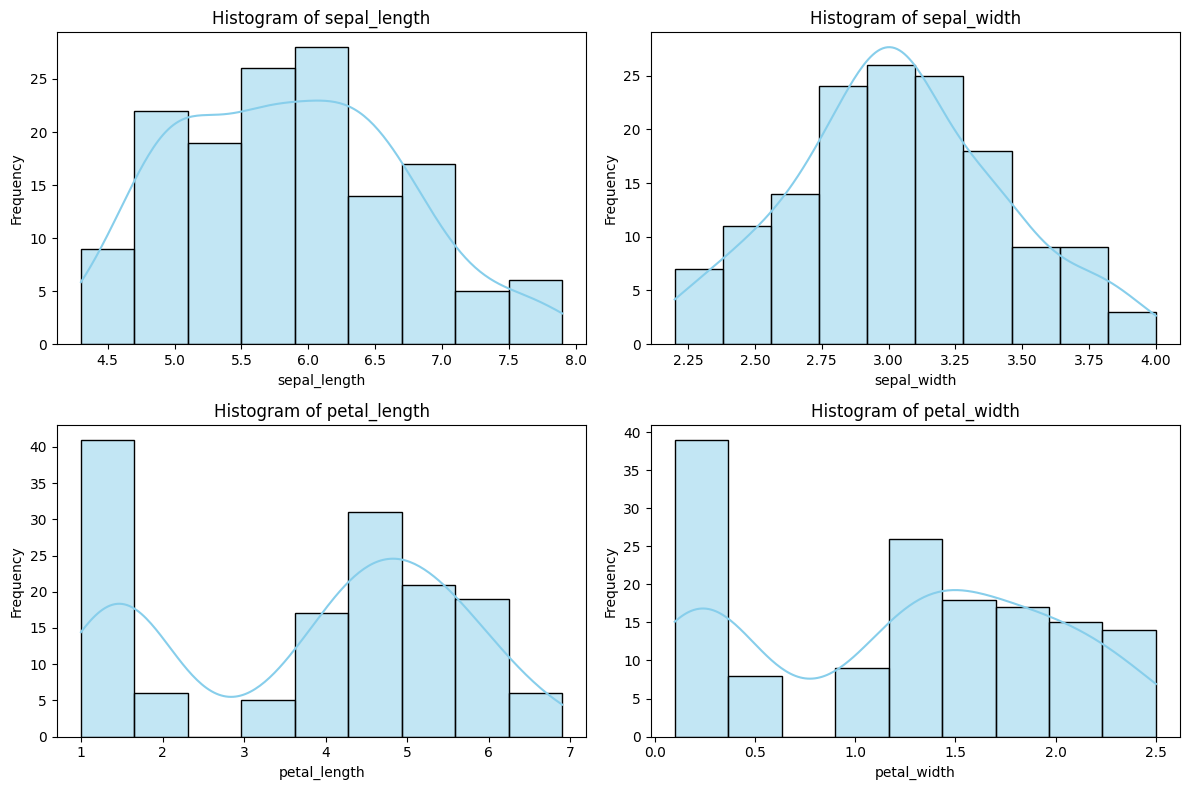

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/cleaned iris.csv')

# Display basic info
print("Dataset shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())

# Plot histograms for all numeric columns
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Correlation Matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.113977      0.879374     0.822577
sepal_width      -0.113977     1.000000     -0.397123    -0.329782
petal_length      0.879374    -0.397123      1.000000     0.961755
petal_width       0.822577    -0.329782      0.961755     1.000000


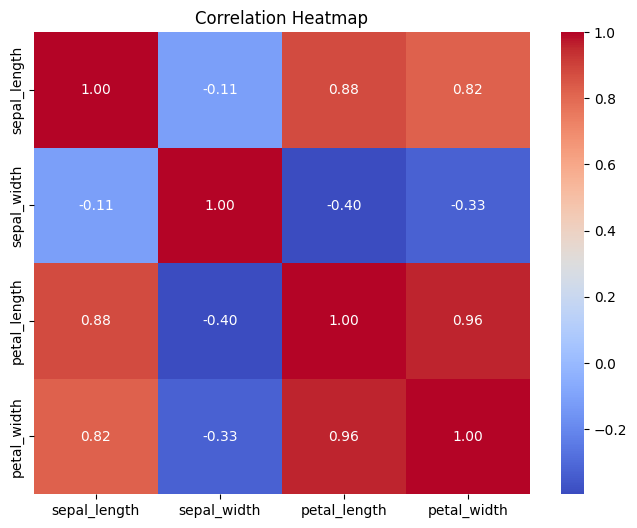


Strong correlations (|corr| > 0.7):
sepal_length ↔ petal_length: correlation = 0.879
sepal_length ↔ petal_width: correlation = 0.823
petal_length ↔ petal_width: correlation = 0.962


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/cleaned iris.csv')

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

print("\nCorrelation Matrix:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Extract strong correlations (absolute value > 0.7)
strong_corrs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_corrs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_value
            ))

# Print strong correlations
if strong_corrs:
    print("\nStrong correlations (|corr| > 0.7):")
    for var1, var2, corr_val in strong_corrs:
        print(f"{var1} ↔ {var2}: correlation = {corr_val:.3f}")
else:
    print("\nNo strong correlations (|corr| > 0.7) found.")
